In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
trial_data_complete = pd.merge(clinical_trial_df, mouse_drug_df, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
trial_data_complete.head()
#trial_data_complete.isnull().values.any()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_respone_data = trial_data_complete[["Drug","Timepoint","Tumor Volume (mm3)"]]

drug_timepoint_grp = tumor_respone_data.groupby(["Drug","Timepoint"])

drug_mean = drug_timepoint_grp["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
tumor_response_mean_df = pd.DataFrame({"Tumor Volume (mm3)" : drug_mean}).reset_index()

# Preview DataFrame
tumor_response_mean_df.head(20)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
drug_standard_error = drug_timepoint_grp["Tumor Volume (mm3)"].sem()
drug_standard_error.head()

# Convert to DataFrame
tumor_response_sterr_df = pd.DataFrame({"Tumor Volume (mm3)" : drug_standard_error}).reset_index()
# Preview DataFrame
tumor_response_sterr_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
tumor_response_mean_df = tumor_response_mean_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
tumor_response_sterr_df = tumor_response_sterr_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
# Preview that Reformatting worked
tumor_response_mean_df
tumor_response_sterr_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [21]:
#['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       #'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
     # dtype='object', name='Drug')
s = tumor_response_mean_df.index
s

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

In [7]:
timepoints = [0,5,10,15,20,25,30,35,40,45]

meanCapomulin = tumor_response_mean_df.iloc[0:,0]
semCapomulin = tumor_response_sterr_df.iloc[0:,0]

meanCeftamin = tumor_response_mean_df.iloc[0:,1]
semCeftamin = tumor_response_sterr_df.iloc[0:,1]

meanInfubinol = tumor_response_mean_df.iloc[0:,2]
semInfubinol = tumor_response_sterr_df.iloc[0:,2]

meanKetapril = tumor_response_mean_df.iloc[0:,3]
semKetapril = tumor_response_sterr_df.iloc[0:,3]
# Generate the Plot (with Error Bars)

# Save the Figure



<Figure size 432x288 with 0 Axes>

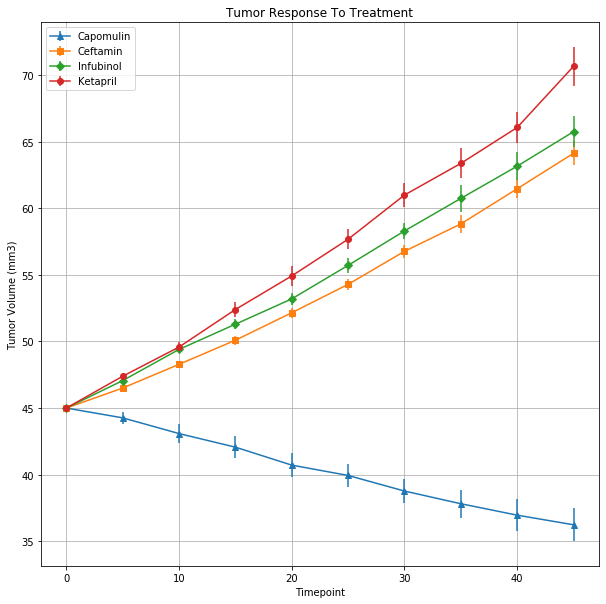

In [8]:
# Show the Figure
#plt.scatter(timepoints, meanCapomulin, marker="o", facecolors="red", edgecolors="black",
 #           s=meanCapomulin, alpha=0.75)

#plt.scatter(timepoints, meanCeftamin, marker="^", facecolors="blue", edgecolors="black",
       #     s=meanCeftamin, alpha=0.75)


#plt.scatter(timepoints, meanInfubinol, marker="s", facecolors="green", edgecolors="black",
   #         s=meanInfubinol, alpha=0.75)


#plt.scatter(timepoints, meanKetapril, marker="D", facecolors="black", edgecolors="black",
       #     s=meanKetapril, alpha=0.75)

fig = plt.figure() 
plt.figure(figsize=(10,10))
plt.errorbar(s, meanCapomulin, yerr=semCapomulin, marker="^",label='Capomulin')

plt.errorbar(timepoints, meanCeftamin, yerr=semCeftamin, marker="s",label='Ceftamin')
plt.errorbar(timepoints, meanInfubinol, yerr=semInfubinol, marker="D",label='Infubinol')
plt.errorbar(timepoints, meanKetapril, yerr=semKetapril,marker="o",label='Ketapril')

plt.title("Tumor Response To Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.legend(loc='best')
plt.grid()
plt.show()


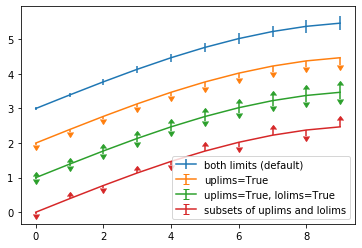

In [9]:
fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)

plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')

#ax.errorbar(x_axis, means, yerr=sem, fmt="o")

plt.errorbar(x, y + 2, yerr=yerr, uplims=True, label='uplims=True')

plt.errorbar(x, y + 1, yerr=yerr, uplims=True, lolims=True,
             label='uplims=True, lolims=True')

upperlimits = [True, False] * 5
lowerlimits = [False, True] * 5
plt.errorbar(x, y, yerr=yerr, uplims=upperlimits, lolims=lowerlimits,
             label='subsets of uplims and lolims')

plt.legend(loc='lower right')

## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [12]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [13]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [15]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [16]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [18]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()